<a href="https://colab.research.google.com/github/OlegBEZb/1LabNS/blob/master/Copy_of_Detectron2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODOS

1. Launch pre-trained model without fine-tuning 

2. Launch CAM (https://github.com/zhoubolei/CAM) and + grad CAM

3. Do human fixate in CAM regions? Fetch images where they do not match. 
What metrics may be used (https://arxiv.org/pdf/1604.03605.pdf)

4. Check other models like YOLO

# Install detectron2

In [82]:
classes = {0: u'__background__',
 1: u'person',
 2: u'bicycle',
 3: u'car',
 4: u'motorcycle',
 5: u'airplane',
 6: u'bus',
 7: u'train',
 8: u'truck',
 9: u'boat',
 10: u'traffic light',
 11: u'fire hydrant',
 12: u'stop sign',
 13: u'parking meter',
 14: u'bench',
 15: u'bird',
 16: u'cat',
 17: u'dog',
 18: u'horse',
 19: u'sheep',
 20: u'cow',
 21: u'elephant',
 22: u'bear',
 23: u'zebra',
 24: u'giraffe',
 25: u'backpack',
 26: u'umbrella',
 27: u'handbag',
 28: u'tie',
 29: u'suitcase',
 30: u'frisbee',
 31: u'skis',
 32: u'snowboard',
 33: u'sports ball',
 34: u'kite',
 35: u'baseball bat',
 36: u'baseball glove',
 37: u'skateboard',
 38: u'surfboard',
 39: u'tennis racket',
 40: u'bottle',
 41: u'wine glass',
 42: u'cup',
 43: u'fork',
 44: u'knife',
 45: u'spoon',
 46: u'bowl',
 47: u'banana',
 48: u'apple',
 49: u'sandwich',
 50: u'orange',
 51: u'broccoli',
 52: u'carrot',
 53: u'hot dog',
 54: u'pizza',
 55: u'donut',
 56: u'cake',
 57: u'chair',
 58: u'couch',
 59: u'potted plant',
 60: u'bed',
 61: u'dining table',
 62: u'toilet',
 63: u'tv',
 64: u'laptop',
 65: u'mouse',
 66: u'remote',
 67: u'keyboard',
 68: u'cell phone',
 69: u'microwave',
 70: u'oven',
 71: u'toaster',
 72: u'sink',
 73: u'refrigerator',
 74: u'book',
 75: u'clock',
 76: u'vase',
 77: u'scissors',
 78: u'teddy bear',
 79: u'hair drier',
 80: u'toothbrush'}

In [83]:
%%capture

!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from pprint import pprint
import tqdm.notebook as tq
import glob

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Config

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
coco_imgs_path = "/content/drive/MyDrive/COCO-Search18 images/"

In [125]:
# faster_rcnn_R_50_C4_3x, faster_rcnn_R_50_FPN_3x
detectron_model = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"  

# Run a pre-trained detectron2 model

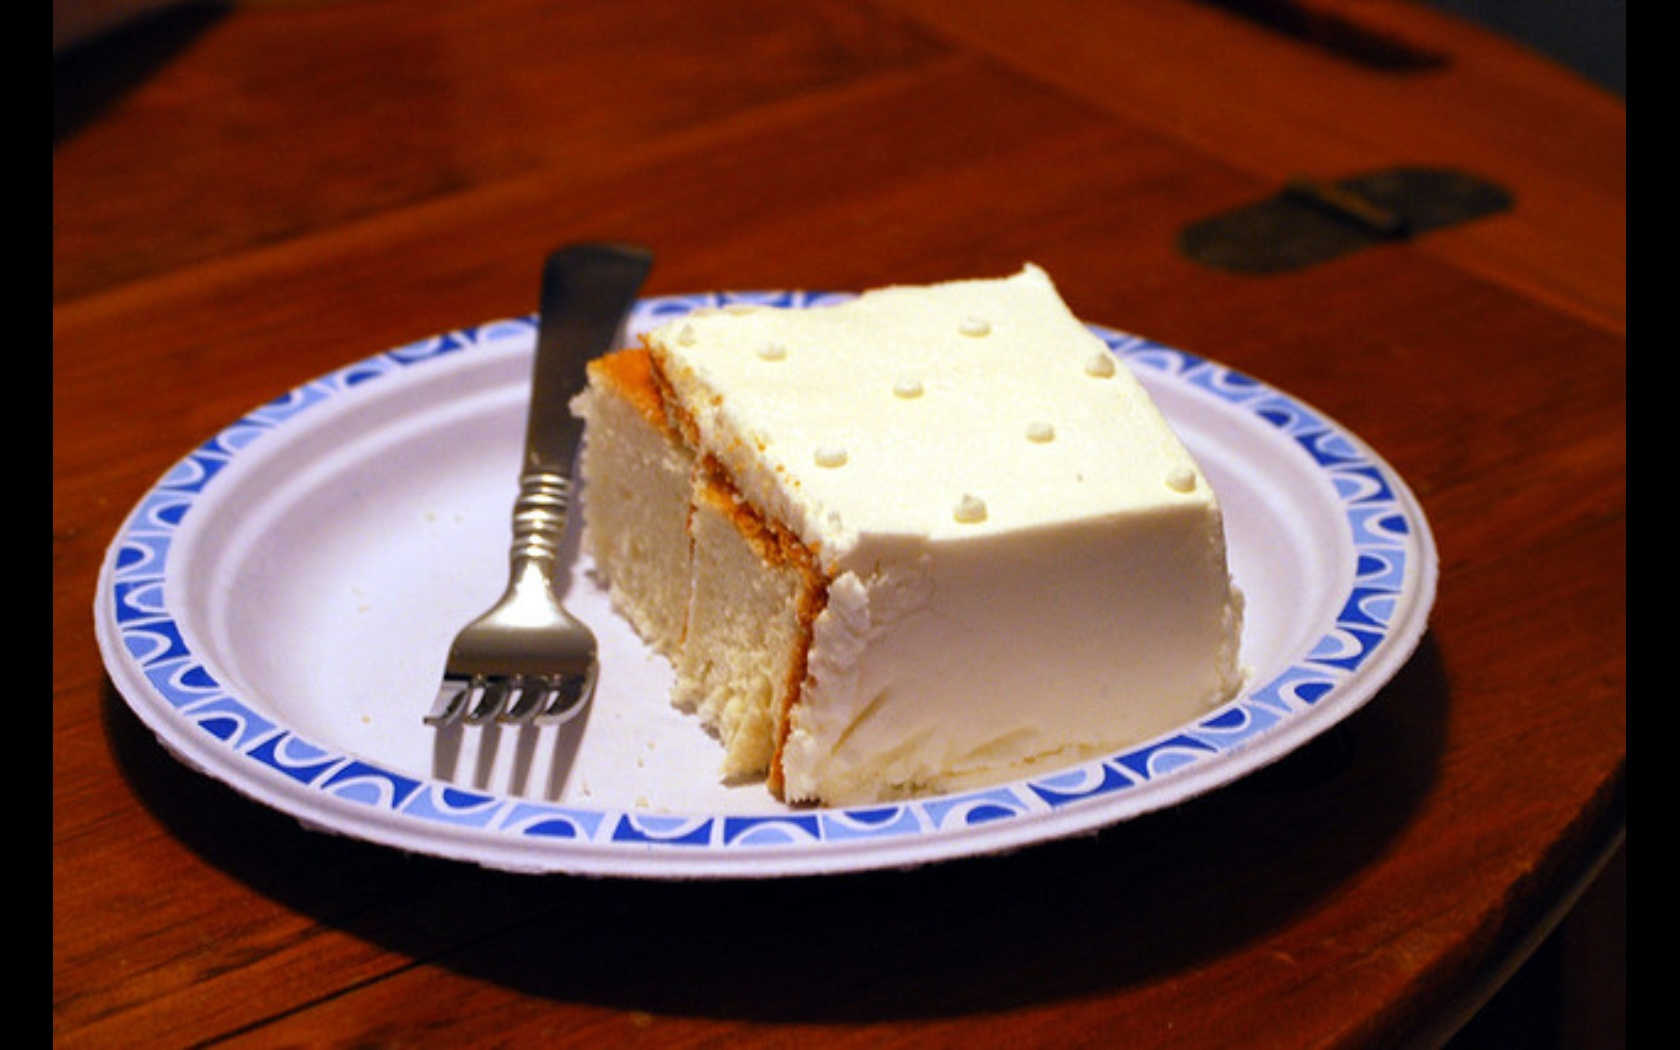

In [126]:
dummy_img_path = os.path.join(coco_imgs_path, 'fork/000000010856.jpg')
im = cv2.imread(dummy_img_path)
height, width = im.shape[:2] #400, 400
# im = cv2.resize(im, (height, width))

from copy import deepcopy
image_org_resized = deepcopy(im)
cv2_imshow(im)

We create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [127]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file(detectron_model))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(detectron_model)

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
# pprint(cfg)

In [128]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [129]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([55, 42, 60], device='cuda:0')
Boxes(tensor([[ 573.3030,  269.0457, 1282.7563,  798.0635],
        [ 424.4861,  214.5561,  654.8057,  804.3943],
        [   0.0000,    0.0000, 1680.0000, 1043.5253]], device='cuda:0'))


In [152]:
res = outputs["instances"]
res.image_size

(1050, 1680)

In [ ]:
res['ob']

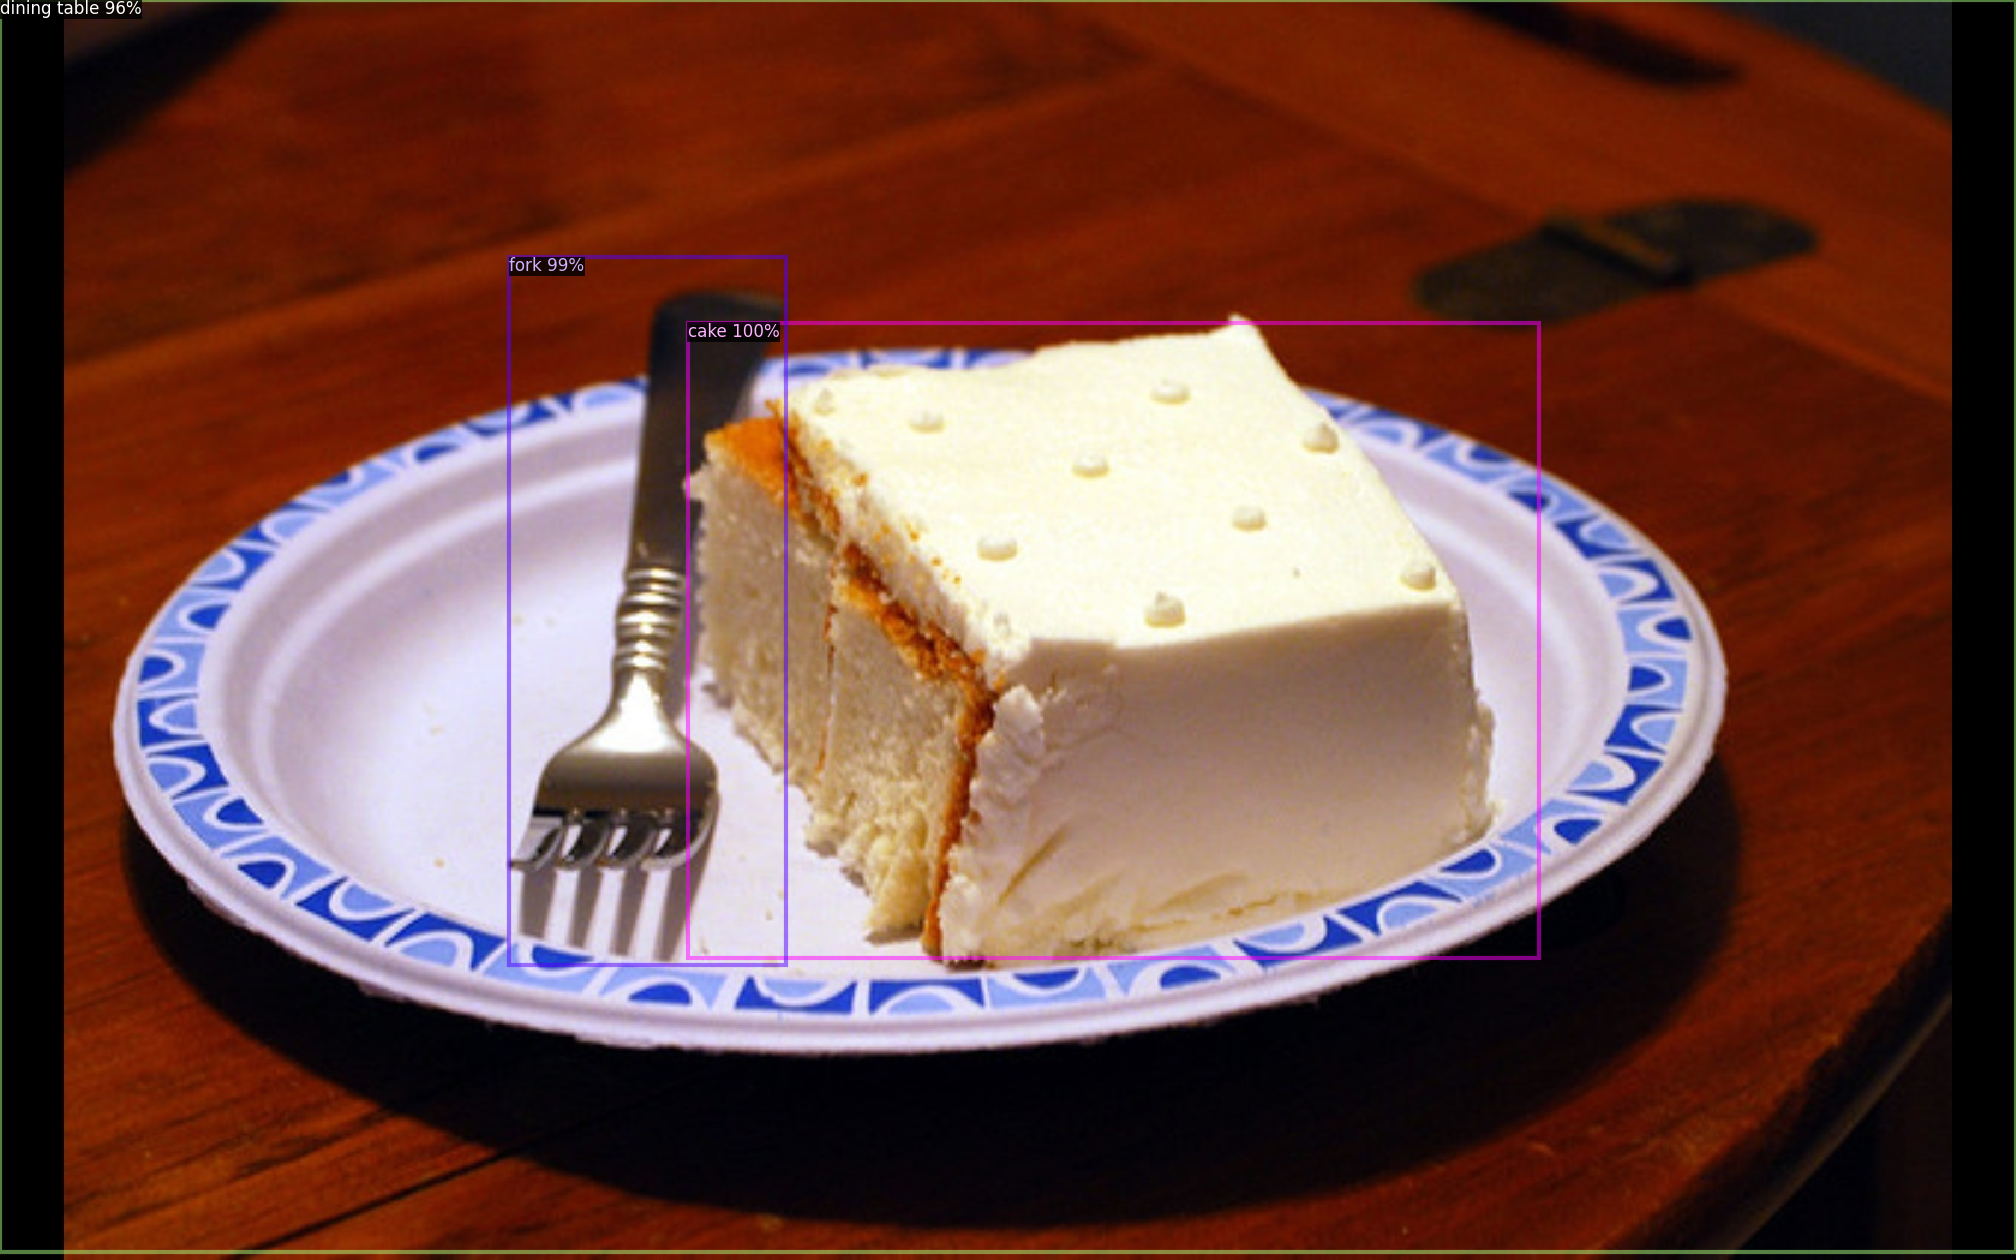

In [131]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], 
               metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), 
               scale=1.2)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# for box in outputs["instances"].pred_boxes.to('cpu'):
#     print(box)
#     v.draw_box(box)
#     v.draw_text(str(box[:2].numpy()), tuple(box[:2].numpy()))
# v = v.get_output()
# img =  v.get_image()[:, :, ::-1]
# cv2_imshow(img)

## Activation maps

In [ ]:
from detectron2.modeling import build_model
#build model
model = build_model(cfg)
model.eval()#make sure its in eval mode

### CAM

In [133]:
# simple implementation of CAM in PyTorch for the networks such as ResNet, DenseNet, SqueezeNet, Inception
# last update by BZ, June 30, 2021

import io
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import numpy as np
import cv2
import json

In [134]:
model._modules.keys()

odict_keys(['backbone', 'proposal_generator', 'roi_heads'])

In [135]:
backbone = model._modules['backbone']

In [136]:
backbone._modules.keys()

odict_keys(['fpn_lateral2', 'fpn_output2', 'fpn_lateral3', 'fpn_output3', 'fpn_lateral4', 'fpn_output4', 'fpn_lateral5', 'fpn_output5', 'top_block', 'bottom_up'])

In [147]:
bottom_up = backbone._modules['bottom_up']

In [151]:
# input image
# LABELS_file = 'imagenet-simple-labels.json'
image_file = dummy_img_path

# # networks such as googlenet, resnet, densenet already use global average pooling at the end, so CAM could be used directly.
# model_id = 1
# if model_id == 1:
#     net = models.squeezenet1_1(pretrained=True)
#     finalconv_name = 'features' # this is the last conv layer of the network
# elif model_id == 2:
#     net = models.resnet18(pretrained=True)
#     finalconv_name = 'layer4'
# elif model_id == 3:
#     net = models.densenet161(pretrained=True)
#     finalconv_name = 'features'
model = bottom_up

model.eval()

# hook the feature extractor
features_blobs = []
def hook_feature(module, input, output):
    features_blobs.append(output.data.cpu().numpy())

# model._modules.get(finalconv_name).register_forward_hook(hook_feature)

# get the softmax weight
params = list(model.parameters())
# weight_softmax = np.squeeze(params[-2].data.numpy())
weight_softmax = np.squeeze(params[-2].data.cpu().numpy())

def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    bz, nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
    return output_cam


normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

# load test image
img_pil = Image.open(image_file)
img_tensor = preprocess(img_pil)
img_variable = Variable(img_tensor.unsqueeze(0))
logit = model(img_variable)

# # load the imagenet category list
# with open(LABELS_file) as f:
#     classes = json.load(f)


h_x = F.softmax(logit, dim=1).data.squeeze()
probs, idx = h_x.sort(0, True)
probs = probs.numpy()
idx = idx.numpy()

# output the prediction
for i in range(0, 5):
    print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

# generate class activation mapping for the top1 prediction
CAMs = returnCAM(features_blobs[0], weight_softmax, [idx[0]])

# render the CAM and output
print('output CAM.jpg for the top1 prediction: %s'%classes[idx[0]])
img = cv2.imread('test.jpg')
height, width, _ = img.shape
heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
result = heatmap * 0.3 + img * 0.5
cv2.imwrite('CAM.jpg', result)

RuntimeError: ignored

### Grad CAM

https://github.com/facebookresearch/detectron2/discussions/3091

In [138]:
# resize image
im = torch.as_tensor(np.ascontiguousarray(im.astype('float32').transpose(2, 0, 1))).requires_grad_(True)

# pass the model through the network
inputs = [{"image": im, "height": height, "width": width}]
with torch.no_grad():
    images = model.preprocess_image(inputs)  # don't forget to preprocess
    features = model.backbone(images.tensor)  # set of cnn features
    res_features = model.backbone.bottom_up(images.tensor)
    proposals, _ = model.proposal_generator(images, features, None)  # RPN

    features_ = [features[f] for f in model.roi_heads.box_in_features]
    box_features_pooler = model.roi_heads.box_pooler(features_, [x.proposal_boxes for x in proposals])
    box_features = model.roi_heads.box_head(box_features_pooler)  # features of all 1k candidates
    predictions = model.roi_heads.box_predictor(box_features) # applies box deltas to readjust proposal boxes, computes non-maximum supression, score threshold and ranks top-k
    #losses = predictions[1]
    
    pred_instances, pred_inds = model.roi_heads.box_predictor.inference(predictions, proposals)
    pred_instances = model.roi_heads.forward_with_given_boxes(features, pred_instances)

    # output boxes, masks, scores, etc
    pred_instances_out = model._postprocess(pred_instances, inputs, images.image_sizes)  # scale box to orig size
    # features of the proposed boxes
    feats = box_features[pred_inds]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


In [139]:
res_features['res5'].shape, res_features['res4'].shape, res_features['res3'].shape

(torch.Size([1, 2048, 33, 53]),
 torch.Size([1, 1024, 66, 106]),
 torch.Size([1, 512, 132, 212]))

feature_conv.shape (1, 1024, 66, 106)


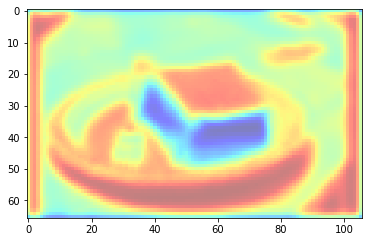

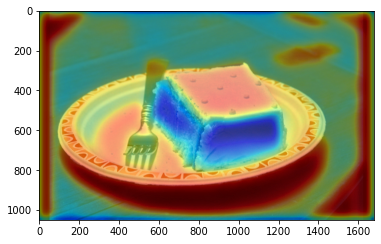

In [140]:
import matplotlib.pyplot as plt 

def getCAM(feature_conv, weight_fc, class_idx):
    # feature_conv.shape = (1, 2048, 7, 7)
    print('feature_conv.shape', feature_conv.shape)
    _, nc, h, w = feature_conv.shape
    # reshaped to (2048, 49)
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w))) 
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    return [cam_img]

feature_conv = res_features['res4'].cpu().data.numpy() # retrieve the feature weights from the layer you are looking for
weight_fc_params = box_features # take the features from the fully connected layer
weight_fc = np.squeeze(weight_fc_params.cpu().data.numpy())

class_idx = 0 # TODO how to select the right row.
overlay = getCAM(feature_conv, weight_fc, 0)

plt.imshow(overlay[0], alpha=0.5, cmap='jet')
plt.show()

cam_resized = cv2.resize(overlay[0], (width, height))
plt.imshow(image_org_resized)
plt.imshow(cam_resized, alpha=0.5, cmap='jet')
plt.show()

# Train on a custom dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.

We'll train a model from an existing model pre-trained on COCO dataset, available in detectron2's model zoo.

## Prepare the dataset

Register the dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).
Here, the dataset is in its custom format, therefore we write a function to parse it and prepare it into detectron2's standard format. User should write such a function when using a dataset in custom format. See the tutorial for more details.


In [ ]:
# import json
# # Opening JSON file
# f = open('/content/drive/MyDrive/coco_search_validation_split1/coco_search18_fixations_TP.json')
# coco_val = json.load(f)
# coco_val[0]

In [ ]:
# for idx, v in enumerate(coco_val[:5]):
#     if v['condition'] == 'present':
#         print(idx, v)

In [ ]:
labels = "bottle, bowl, car, chair, clock, cup, fork, keyboard, knife, laptop, microwave, mouse, oven, potted plant, sink, stop sign, toilet, tv"
labels = labels.split(', ')
label2id = {l: i for i, l in enumerate(labels)}
label2id

{'bottle': 0,
 'bowl': 1,
 'car': 2,
 'chair': 3,
 'clock': 4,
 'cup': 5,
 'fork': 6,
 'keyboard': 7,
 'knife': 8,
 'laptop': 9,
 'microwave': 10,
 'mouse': 11,
 'oven': 12,
 'potted plant': 13,
 'sink': 14,
 'stop sign': 15,
 'toilet': 16,
 'tv': 17}

In [ ]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

from detectron2.structures import BoxMode

def get_coco_search_dicts(img_dir):
    json_file = os.path.join(img_dir, "coco_search18_fixations_TP.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    # Remove me
    # imgs_anns = imgs_anns[:100]

    dataset_dicts = []
    for idx, v in tq.tqdm(enumerate(imgs_anns), total=len(imgs_anns)):
        record = {}
        
        filename = glob.glob(coco_imgs_path + f"**/{v['name']}", recursive=True)[0]
        # print('filename', filename)
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        
        obj = {
            "bbox": v['bbox'],
            "bbox_mode": BoxMode.XYWH_ABS,
            "category_id": label2id[v['task']],
        }
        # print('label', obj['category_id'])
        record["annotations"] = [obj]
       
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["coco_search_train_split1", "coco_search_validation_split1"]: # create train and test one
    try:
        DatasetCatalog.remove(d)
        MetadataCatalog.remove(d)
    except:
        pass
    DatasetCatalog.register(d, lambda d=d: get_coco_search_dicts('/content/drive/MyDrive/' + d))
    MetadataCatalog.get(d).set(thing_classes=labels)

coco_search_metadata = MetadataCatalog.get(d)

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



In [ ]:
# dataset_dicts = get_coco_search_dicts("/content/drive/MyDrive/coco_search_validation_split1")
# for d in random.sample(dataset_dicts, 3):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=coco_search_metadata, scale=0.5)
#     out = visualizer.draw_dataset_dict(d)
#     cv2_imshow(out.get_image()[:, :, ::-1])

## Train!

Now, let's fine-tune a COCO-pretrained R50-FPN R-CNN model on our dataset.


In [ ]:
DatasetCatalog.list()[-5:]

['voc_2012_val',
 'ade20k_sem_seg_train',
 'ade20k_sem_seg_val',
 'coco_search_train_split1',
 'coco_search_validation_split1']

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(detectron_model))
cfg.DATASETS.TRAIN = ("coco_search_train_split1")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(detectron_model)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(labels)  # (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 

[11/09 08:38:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

  0%|          | 0/21622 [00:00<?, ?it/s]

[11/09 09:21:42 d2.data.build]: Removed 0 images with no usable annotations. 21622 images left.
[11/09 09:21:44 d2.data.build]: Distribution of instances among all 18 categories:
|  category  | #instances   |   category   | #instances   |  category  | #instances   |
|:----------:|:-------------|:------------:|:-------------|:----------:|:-------------|
|   bottle   | 1160         |     bowl     | 980          |    car     | 720          |
|   chair    | 1766         |    clock     | 830          |    cup     | 1930         |
|    fork    | 1610         |   keyboard   | 1280         |   knife    | 980          |
|   laptop   | 860          |  microwave   | 1089         |   mouse    | 758          |
|    oven    | 700          | potted plant | 1070         |    sink    | 1950         |
| stop sign  | 880          |    toilet    | 1099         |     tv     | 1960         |
|            |              |              |              |            |              |
|   total    | 21622        |

In [ ]:
trainer.resume_or_load(resume=False)
trainer.train()

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (19, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (19,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (72, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (72,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[11/09 09:21:51 d2.engine.train_loop]: Starting training from iteration 0
[11/09 09:22:16 d2.utils.events]:  eta: 0:05:44  iter: 19  total_loss: 3.366  loss_cls: 2.872  loss_box_reg: 0.4724  loss_rpn_cls: 0.0152  loss_rpn_loc: 0.002544  time: 1.2510  data_time: 0.0228  lr: 1.6068e-05  max_mem: 2792M
[11/09 09:22:41 d2.utils.events]:  eta: 0:05:19  iter: 39  total_loss: 2.976  loss_cls: 2.501  loss_box_reg: 0.4452  loss_rpn_cls: 0.02112  loss_rpn_loc: 0.002608  time: 1.2406  data_time: 0.0067  lr: 3.2718e-05  max_mem: 2792M
[11/09 09:23:06 d2.utils.events]:  eta: 0:04:56  iter: 59  total_loss: 2.251  loss_cls: 1.805  loss_box_reg: 0.4504  loss_rpn_cls: 0.01715  loss_rpn_loc: 0.002982  time: 1.2507  data_time: 0.0070  lr: 4.9367e-05  max_mem: 2792M
[11/09 09:23:32 d2.utils.events]:  eta: 0:04:32  iter: 79  total_loss: 1.453  loss_cls: 0.9181  loss_box_reg: 0.4504  loss_rpn_cls: 0.01059  loss_rpn_loc: 0.001821  time: 1.2601  data_time: 0.0069  lr: 6.6017e-05  max_mem: 2792M
[11/09 09:23:5

In [ ]:
# # Look at training curves in tensorboard:
# %load_ext tensorboard
# %tensorboard --logdir output

# Inference & evaluation using the trained model
Now, let's run inference with the trained model on the validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.utils.visualizer import ColorMode

im = cv2.imread(os.path.join(coco_imgs_path, 'chair/000000007220.jpg'))
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                metadata=coco_search_metadata, 
                scale=0.5, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Then, we randomly select several samples to visualize the prediction results.

In [ ]:
# from detectron2.utils.visualizer import ColorMode
# dataset_dicts = get_coco_search_dicts("coco_search_validation_split1")
# for d in random.sample(dataset_dicts, 3):    
#     im = cv2.imread(d["file_name"])
#     outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
#     v = Visualizer(im[:, :, ::-1],
#                    metadata=coco_search_metadata, 
#                    scale=0.5, 
#                    instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
#     )
#     out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#     cv2_imshow(out.get_image()[:, :, ::-1])

We can also evaluate its performance using AP metric implemented in COCO API.

In [ ]:
# #import the COCO Evaluator to use the COCO Metrics
# from detectron2.evaluation import COCOEvaluator, inference_on_dataset
# from detectron2.data import build_detection_test_loader

# #Call the COCO Evaluator function and pass the Validation Dataset
# evaluator = COCOEvaluator("balloon_val", cfg, False, output_dir="/output/")
# val_loader = build_detection_test_loader(cfg, "balloon_val")

# #Use the created predicted model in the previous step
# inference_on_dataset(predictor.model, val_loader, evaluator)

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("coco_search_validation_split1", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "coco_search_validation_split1")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[11/09 09:35:55 d2.evaluation.coco_evaluation]: Trying to convert 'coco_search_validation_split1' to COCO format ...
[11/09 09:35:55 d2.data.datasets.coco]: Converting annotations of dataset 'coco_search_validation_split1' to COCO format ...)


  0%|          | 0/3258 [00:00<?, ?it/s]

[11/09 09:42:27 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[11/09 09:42:28 d2.data.datasets.coco]: Conversion finished, #images: 3258, #annotations: 3258
[11/09 09:42:28 d2.data.datasets.coco]: Caching COCO format annotations at './output/coco_search_validation_split1_coco_format.json' ...


  0%|          | 0/3258 [00:00<?, ?it/s]

[11/09 09:46:28 d2.data.build]: Distribution of instances among all 18 categories:
|  category  | #instances   |   category   | #instances   |  category  | #instances   |
|:----------:|:-------------|:------------:|:-------------|:----------:|:-------------|
|   bottle   | 170          |     bowl     | 150          |    car     | 120          |
|   chair    | 258          |    clock     | 130          |    cup     | 280          |
|    fork    | 230          |   keyboard   | 200          |   knife    | 150          |
|   laptop   | 130          |  microwave   | 160          |   mouse    | 120          |
|    oven    | 110          | potted plant | 170          |    sink    | 290          |
| stop sign  | 130          |    toilet    | 170          |     tv     | 290          |
|            |              |              |              |            |              |
|   total    | 3258         |              |              |            |              |
[11/09 09:46:28 d2.data.dataset_mappe